In [18]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve

### Creating a synthetic dataset for classification

In [51]:
X, y = make_classification(n_samples = 10000, n_features = 500)
X = np.reshape(X, [X.shape[0], X.shape[1], 1])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print(f"X_train: {X_train.shape} - y_train: {y_train.shape}")
print(f"X_test: {X_test.shape} - y_test: {y_test.shape}")

X_train: (7000, 500, 1) - y_train: (7000,)
X_test: (3000, 500, 1) - y_test: (3000,)


### Defining LSTM and GRU models

In [52]:
seed = 0
tf.random.set_random_seed(seed)
np.random.seed(seed)

#####################################
####### DEFINING LSTM MODEL #########
#####################################

length = X_train.shape[1]
n_features = X_train.shape[-1]
n_classes = to_categorical(y_train).shape[-1]

model_lstm = Sequential()

model_lstm.add(LSTM(units = 100, 
              input_shape = (length, n_features), return_sequences = False))
model_lstm.add(Dense(n_classes, activation = "softmax"))

model_lstm.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])
model_lstm.summary()

#####################################
######## DEFINING GRU MODEL #########
#####################################

seed = 0
tf.random.set_random_seed(seed)
np.random.seed(seed)

model_gru = Sequential()

model_gru.add(GRU(units = 100, 
              input_shape = (length, n_features), return_sequences = False))
model_gru.add(Dense(n_classes, activation = "softmax"))

model_gru.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])
model_gru.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 202       
Total params: 41,002
Trainable params: 41,002
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 100)               30600     
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 202       
Total params: 30,802
Trainable params: 30,802
Non-trainable params: 0
_________________________________________________________________


### Training LSTM model and evaluating performance

In [53]:
seed = 0
tf.random.set_random_seed(seed)
np.random.seed(seed)

fpr = {'lstm' : None, 'gru' : None}
tpr = {'lstm' : None, 'gru' : None}

hist = model_lstm.fit(X_train,
                   to_categorical(y_train),
                   epochs = 10,
                   batch_size = 100)

y_logits = model_lstm.predict(X_test)

# Computing scores for the positive class only (taking position '1' as the positive class)
y_scores = y_logits[:,1]
fpr['lstm'], tpr['lstm'], _ = roc_curve(y_test, y_scores)

Train on 7000 samples
Epoch 1/10
7000/7000 [==============================] - 49s 7ms/sample - loss: 0.6927 - acc: 0.5063
Epoch 2/10
7000/7000 [==============================] - 45s 6ms/sample - loss: 0.6754 - acc: 0.5771
Epoch 3/10
7000/7000 [==============================] - 49s 7ms/sample - loss: 0.6598 - acc: 0.6063
Epoch 4/10
7000/7000 [==============================] - 54s 8ms/sample - loss: 0.6524 - acc: 0.6201
Epoch 5/10
7000/7000 [==============================] - 43s 6ms/sample - loss: 0.6480 - acc: 0.6254
Epoch 6/10
7000/7000 [==============================] - 41s 6ms/sample - loss: 0.6449 - acc: 0.6291
Epoch 7/10
7000/7000 [==============================] - 41s 6ms/sample - loss: 0.6403 - acc: 0.6310
Epoch 8/10
7000/7000 [==============================] - 39s 6ms/sample - loss: 0.6402 - acc: 0.6327
Epoch 9/10
7000/7000 [==============================] - 39s 6ms/sample - loss: 0.6335 - acc: 0.6413
Epoch 10/10
7000/7000 [==============================] - 40s 6ms/sample - loss

In [49]:
seed = 0
tf.random.set_random_seed(seed)
np.random.seed(seed)

hist = model_gru.fit(X_train,
                   to_categorical(y_train),
                   epochs = 10,
                   batch_size = 100)

y_logits = model_gru.predict(X_test)

# Computing scores for the positive class only (taking position '1' as the positive class)
y_scores = y_logits[:,1]
fpr['gru'], tpr['gru'], _ = roc_curve(y_test, y_scores)

Train on 700 samples
Epoch 1/10
700/700 [==============================] - 4s 5ms/sample - loss: 0.6915 - acc: 0.5300
Epoch 2/10
700/700 [==============================] - 3s 5ms/sample - loss: 0.6914 - acc: 0.5200
Epoch 3/10
700/700 [==============================] - 3s 5ms/sample - loss: 0.6911 - acc: 0.5243
Epoch 4/10
700/700 [==============================] - 3s 5ms/sample - loss: 0.6911 - acc: 0.5300
Epoch 5/10
700/700 [==============================] - 3s 5ms/sample - loss: 0.6906 - acc: 0.5300
Epoch 6/10
700/700 [==============================] - 3s 5ms/sample - loss: 0.6902 - acc: 0.5271
Epoch 7/10
700/700 [==============================] - 3s 5ms/sample - loss: 0.6901 - acc: 0.5229
Epoch 8/10
700/700 [==============================] - 3s 5ms/sample - loss: 0.6898 - acc: 0.5329
Epoch 9/10
700/700 [==============================] - 3s 5ms/sample - loss: 0.6897 - acc: 0.5157
Epoch 10/10
700/700 [==============================] - 3s 5ms/sample - loss: 0.6886 - acc: 0.5343


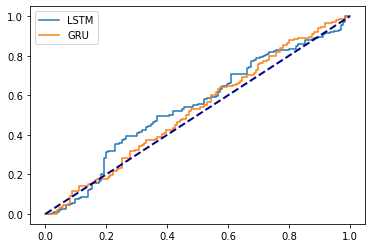

In [50]:
plt.plot(fpr['lstm'], tpr['lstm'], label = "LSTM")
plt.plot(fpr['gru'], tpr['gru'], label = "GRU")
plt.plot([0, 1], [0, 1], color='navy', lw = 2, linestyle = '--')

plt.legend()